<a href="https://colab.research.google.com/github/ramanjaneyalu/Develop-a-Model-to-Predict-Ice-Cream-Sales-Using-Temperature/blob/master/Develop_a_Model_to_Predict_Ice_Cream_Sales_Using_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example, we will cover regression in more details in future projects. 


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

     |████████████████████████████████| 332.1MB 42kB/s 
     |████████████████████████████████| 3.0MB 43.5MB/s 
     |████████████████████████████████| 419kB 47.3MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

# STEP #1: IMPORT DATASET

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sales_df = pd.read_csv('/content/drive/My Drive/SalesData.csv')

In [6]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [7]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [8]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP #2: VISUALIZE DATASET

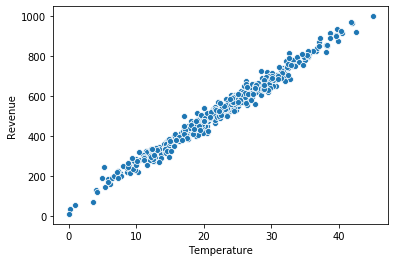

In [11]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [0]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

# STEP#4: BUILD AND TRAIN THE MODEL

In [13]:
X_train.shape

(500,)

In [14]:
y_train.shape

(500,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [18]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
500/500 [==============================] - 1s 1ms/sample - loss: 312114.5030
Epoch 2/1000
500/500 [==============================] - 0s 107us/sample - loss: 270120.3800
Epoch 3/1000
500/500 [==============================] - 0s 119us/sample - loss: 232132.5181
Epoch 4/1000
500/500 [==============================] - 0s 104us/sample - loss: 198496.2246
Epoch 5/1000
500/500 [==============================] - 0s 110us/sample - loss: 168732.4414
Epoch 6/1000
500/500 [==============================] - 0s 110us/sample - loss: 142226.2154
Epoch 7/1000
500/500 [==============================] - 0s 101us/sample - loss: 119193.4299
Epoch 8/1000
500/500 [==============================] - 0s 98us/sample - loss: 99485.2374
Epoch 9/1000
500/500 [==============================] - 0s 110us/sample - loss: 82284.4467
Epoch 10/1000
500/500 [==============================] - 0s 115us/sample - loss: 67612.0483
Epoch 11/1000
500/500 [==============================] - 0s 105us/sample - loss: 5521

# STEP#5: EVALUATE THE MODEL 

In [19]:
epochs_hist.history.keys()

dict_keys(['loss'])

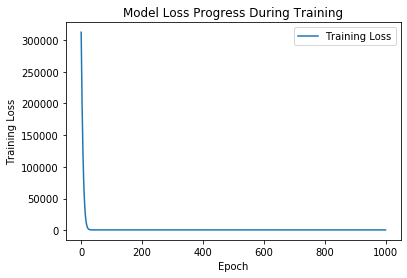

In [20]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [21]:
model.get_weights()

[array([[21.405342]], dtype=float32), array([44.725094], dtype=float32)]

In [22]:
# Use the trained model to perform predictions


Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)


Revenue Predictions Using Trained ANN = [[151.7518]]


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

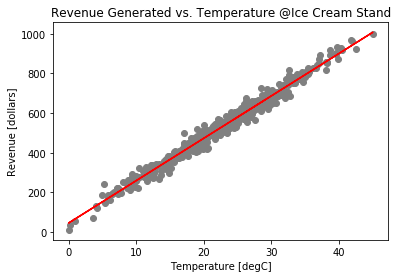

In [23]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

# STEP #6 (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

In [0]:
X_train = X_train.values.reshape(-1,1)

In [25]:
X_train.shape

(500, 1)

In [0]:
y_train = y_train.values.reshape(-1,1)

In [27]:
y_train.shape

(500, 1)

In [31]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

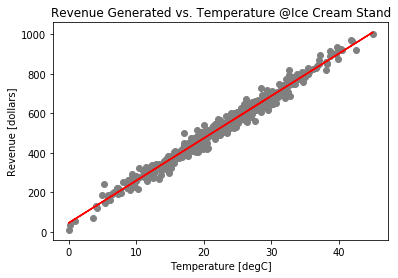

In [33]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')